In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# reading csv files
data =  pd.read_csv('dermatology.data', sep=",", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


# Data Cleaning #

In [3]:
#fixing df columns

data.columns = ["erythema", "scaling", "definite borders", "itching", "koebner phenomenon", "polygonal papules", "follicular papules", "oral mucosal involvement", "knee and elbow involvement", "scalp involvement", "family history", "melanin incontinence", "eosinophils in the infiltrate", "PNL infiltrate", "fibrosis of the papillary dermis", "exocytosis", "acanthosis", "hyperkeratosis", "parakeratosis", "clubbing of the rete ridges", "elongation of the rete ridges", "thinning of the suprapapillary epidermis", "spongiform pustule", "munro microabcess", "focal hyperganulosis", "disappearance of the granular layer", "vacuolisation and damage of basal layer", "spongioses", "saw-tooth appearance of retes", "follicular horn plug", "perifollicular parakeratosis", "inflammatory monoluclear inflitrate", "bad-like infiltrate", "age", "disease"]

In [4]:
data.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongioses,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,bad-like infiltrate,age,disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [5]:
data = data[data['age'] != '?']

In [6]:
data['age'] = pd.to_numeric(data['age'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#EDA#



In [7]:
clinical_col = data.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 33]].tolist()
histopath_col = data.columns[11:].tolist()
histopath_col.remove('age')

print('clinical columns: \n', clinical_col, '\n \n')
print('histopathological columns: \n', histopath_col, '\n \n')

clinical columns: 
 ['erythema', 'scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules', 'follicular papules', 'oral mucosal involvement', 'knee and elbow involvement', 'scalp involvement', 'family history', 'age'] 
 

histopathological columns: 
 ['melanin incontinence', 'eosinophils in the infiltrate', 'PNL infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges', 'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hyperganulosis', 'disappearance of the granular layer', 'vacuolisation and damage of basal layer', 'spongioses', 'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate', 'bad-like infiltrate', 'disease'] 
 



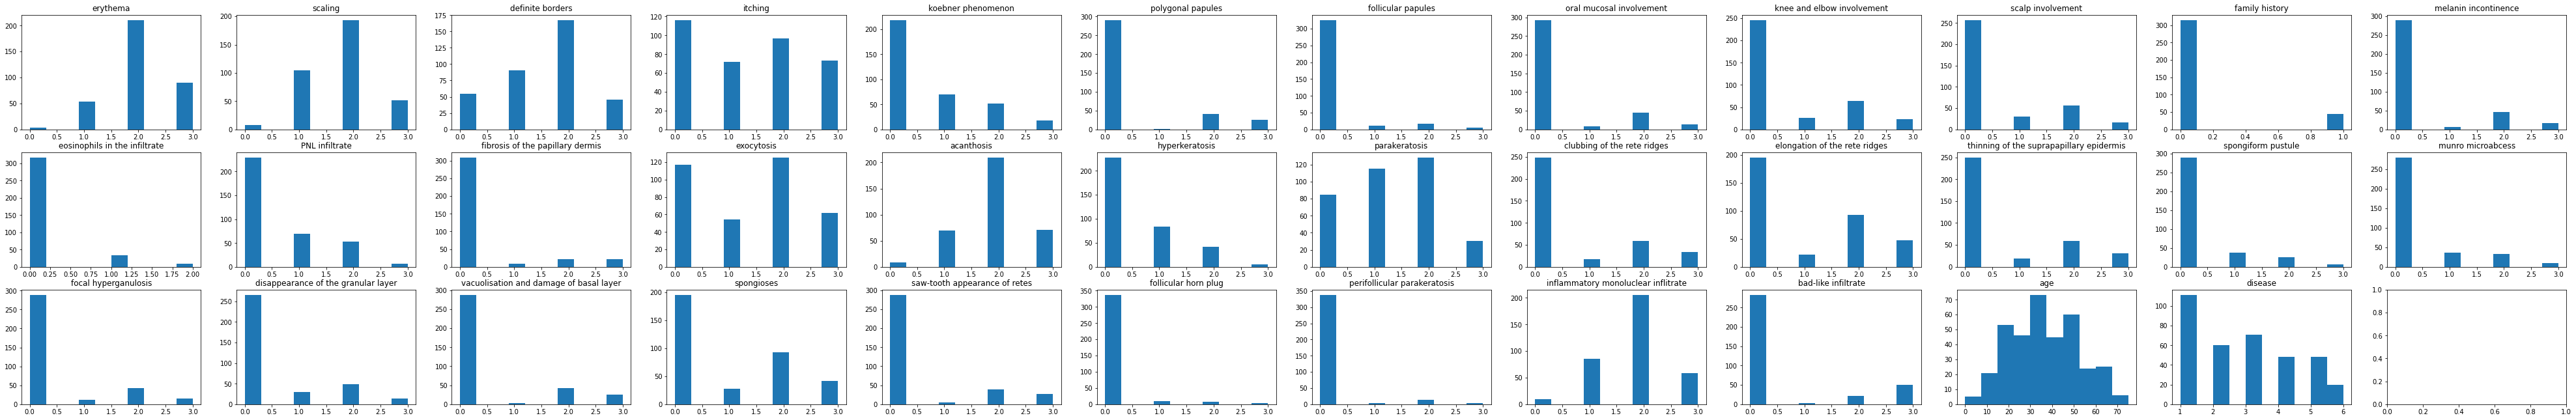

In [8]:
fig, axes = plt.subplots(3, round(len(data.columns)/3))
fig.set_figwidth(len(data.columns)*2)
fig.set_figheight(len(data.columns)//3)
axes = axes.flatten()

for i, col in enumerate(data.columns):
  axes[i].hist(data[col])
  axes[i].set_title(col)


In [9]:
data['age'].value_counts()[:5]

40    17
50    17
27    16
36    16
22    15
Name: age, dtype: int64

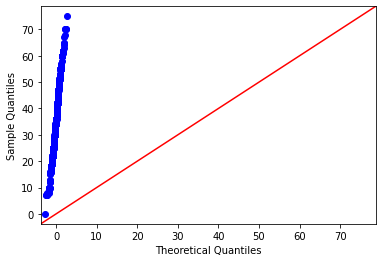

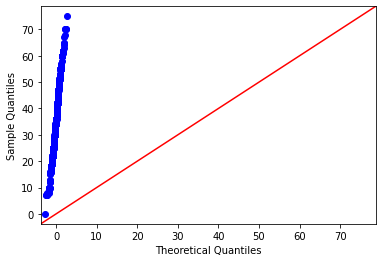

In [10]:
sm.qqplot(data['age'], line = '45')

(40.0, 78.75)

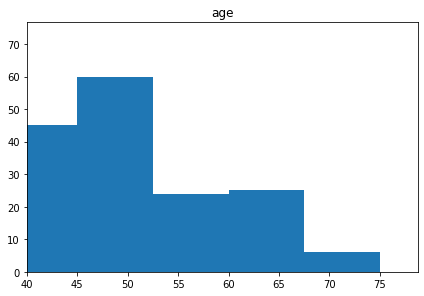

In [11]:
plt.hist(data['age'])
plt.tight_layout()
plt.title('age')
plt.xlim(40)

Text(0.5, 1.0, 'distribution of diseases')

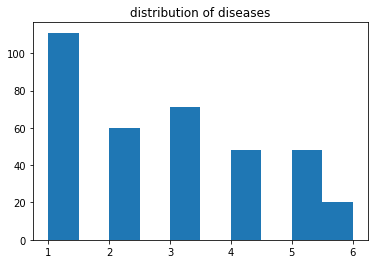

In [12]:
#see balance of dataset

plt.hist(data['disease'])
plt.title('distribution of diseases')


In [13]:
data['disease'].value_counts()

1    111
3     71
2     60
5     48
4     48
6     20
Name: disease, dtype: int64

# Random Forest #


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



X = data[data.columns[:-1]]
y = data[data.columns[-1]]



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=39)

In [16]:

#depth optimization on training
depth_scores = {}

for depth in range(1, 20):

  clf = RandomForestClassifier(max_depth=depth, random_state=0)
  clf.fit(X_train, y_train)
  depth_scores[depth] = clf.score(X_test, y_test)


inv_dict = {v: k for k, v in depth_scores.items()}
optimal_depth = inv_dict[max(depth_scores.values())]

print(f'optimal depth of random forest classifier is: {optimal_depth} with a testing accuracy of {depth_scores[optimal_depth]}')

optimal depth of random forest classifier is: 9 with a testing accuracy of 0.9888888888888889


In [20]:
#final model with all data

clf = RandomForestClassifier(max_depth=optimal_depth, random_state=0)
clf.fit(X, y)
clf.score(X, y)

1.0